analises exploratorias do dataset antes de limpeza

In [2]:
import sys
sys.path.append("../src")
import pandas as pd
from preprocess import load_data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = load_data("../data/census.csv")
print(df.head())

   age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loos  hour-per-week  native-country  income  
0          2174             0    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for workclass:
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


Value counts for education:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64


Value counts for marital-status:
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtyp

In [7]:
print(df.isnull().sum())

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64


In [8]:
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

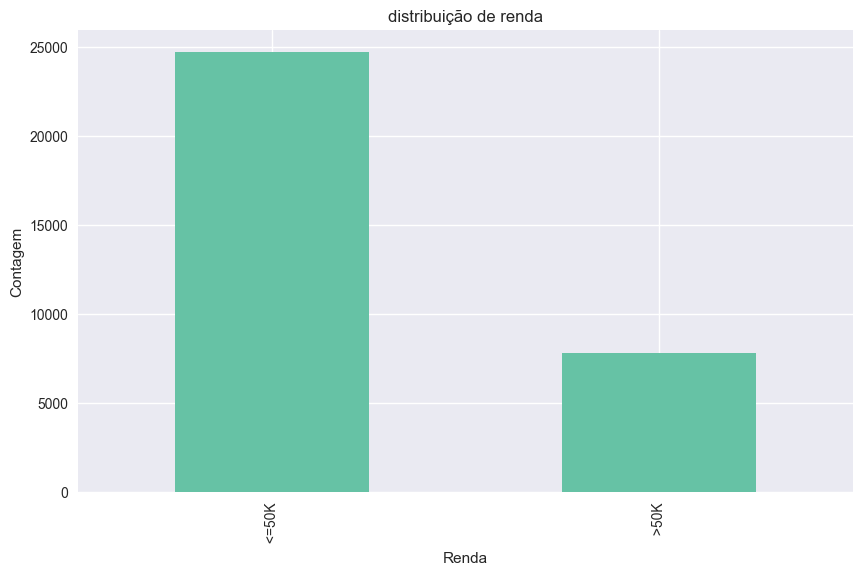

In [9]:
plt.figure(figsize=(10, 6))
df['income'].value_counts().plot(kind='bar')
plt.title('distribuição de renda')
plt.xlabel('Renda')
plt.ylabel('Contagem')
plt.show()

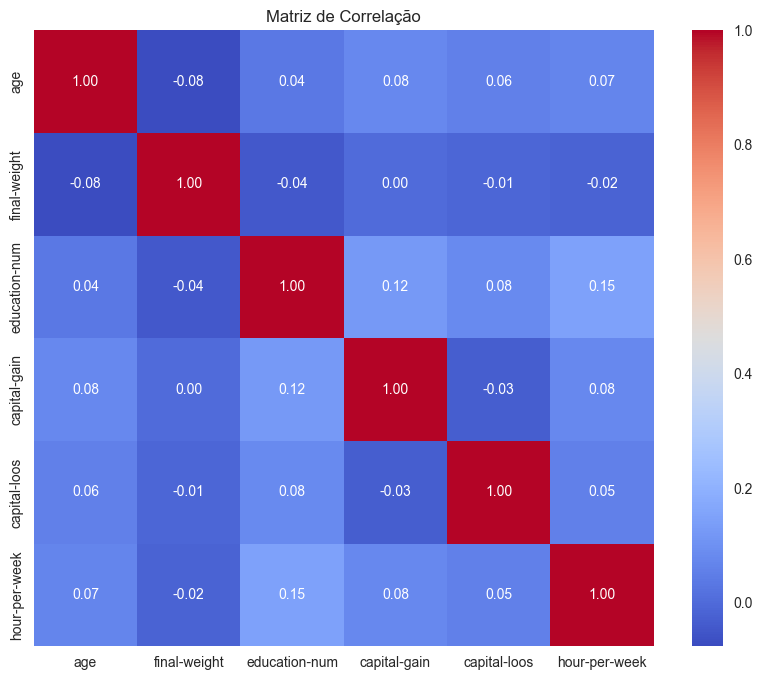

In [10]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


(array([2410., 3160., 2461., 3429., 3465., 2583., 3198., 2965., 1828.,
        2139., 1558., 1033.,  996.,  599.,  269.,  227.,  120.,   54.,
          20.,   47.]),
 array([17.  , 20.65, 24.3 , 27.95, 31.6 , 35.25, 38.9 , 42.55, 46.2 ,
        49.85, 53.5 , 57.15, 60.8 , 64.45, 68.1 , 71.75, 75.4 , 79.05,
        82.7 , 86.35, 90.  ]),
 <BarContainer object of 20 artists>)

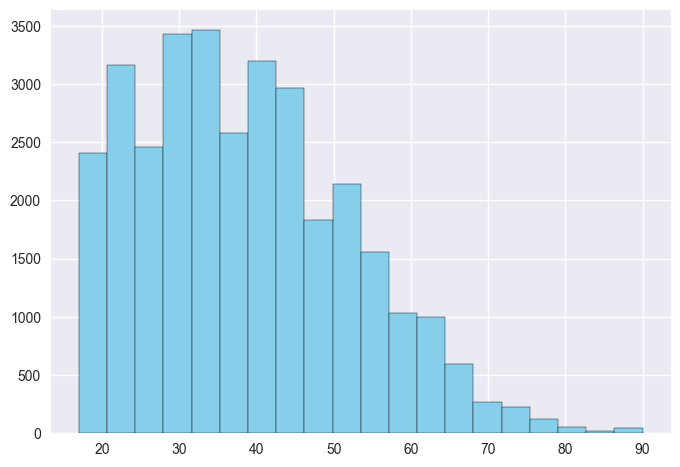

In [11]:
plt.hist(x='age', data=df, bins=20, color='skyblue', edgecolor='black')

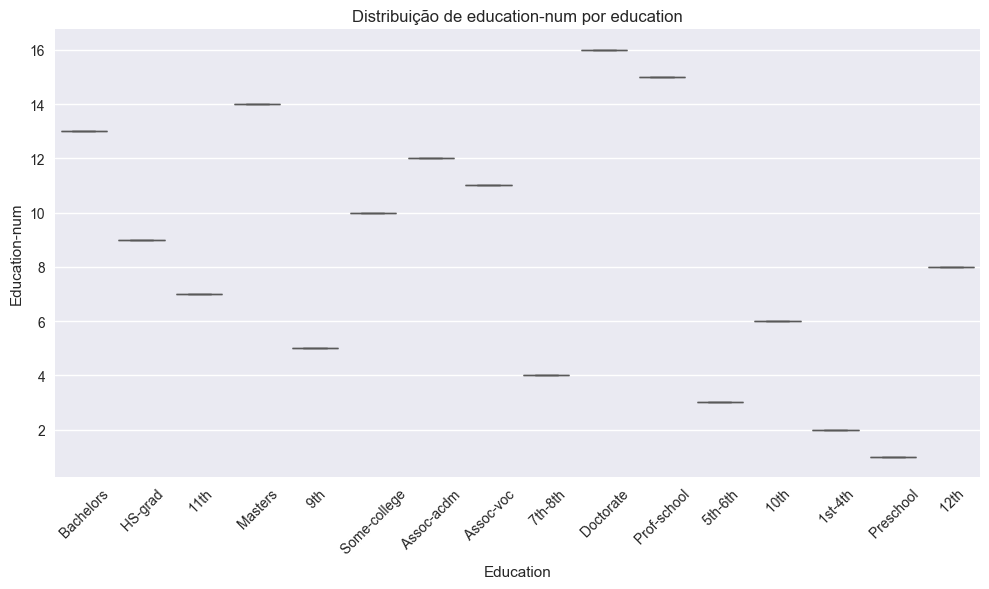

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='education-num', data=df)
plt.xticks(rotation=45)
plt.title('Distribuição de education-num por education')
plt.xlabel('Education')
plt.ylabel('Education-num')
plt.tight_layout()
plt.show()

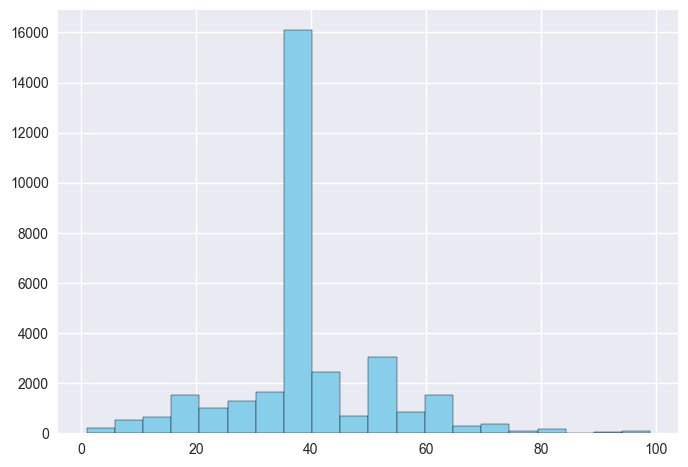

In [13]:
plt.hist(x=df['hour-per-week'], bins=20, color='skyblue', edgecolor='black')
plt.show()


In [15]:
gr = px.scatter(df, x='age', y='hour-per-week', color='income', title='Idade vs Horas por Semana Trabalhadas')
gr.show()

In [16]:
# Convert 'income' to numeric: 0 for '<=50K', 1 for '>50K'
df_education_income = pd.DataFrame({
    'income_num': df['income'].apply(lambda x: 1 if x == '>50K' else 0),
    'education': df['education']
})
df_education_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   income_num  32561 non-null  int64 
 1   education   32561 non-null  object
dtypes: int64(1), object(1)
memory usage: 508.9+ KB


In [19]:
gf = px.treemap(df, path=['education', 'income'], title='Renda por Nível de Educação')
gf.show()

In [20]:
gr = px.treemap(df, path=['marital-status', 'income'], title='Renda por Estado Civil')
gr.show()

In [21]:
gr = px.parallel_categories(df, dimensions=['education', 'income'], title='Relação entre Educação e Renda')
gr.show()

In [22]:
gr = px.parallel_categories(df, dimensions=['workclass', 'income'], title='Relação entre Classe de Trabalho e Renda')
gr.show()

data cleaning

In [25]:
census = df.copy()
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [32]:
print(df.isnull().sum())

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64


FAzer a substituição the "?" por other nas colunas workclass e ocupation e por "na" em native-country

In [28]:
mask = (census == ' ?').sum()
mask = mask[mask > 0]
print(mask)
print(f"Total de valores ausentes: {(census == ' ?').sum().sum()}")

workclass         1836
occupation        1843
native-country     583
dtype: int64
Total de valores ausentes: 4262


In [29]:
census['workclass'] = census['workclass'].replace(' ?', 'other')
census['occupation'] = census['occupation'].replace(' ?', 'other')
census['native-country'] = census['native-country'].replace(' ?', pd.NA)

In [31]:
mask = (census == ' ?').sum()
mask = mask[mask > 0]
print(mask)
print(f"Total de valores ausentes: {(census == ' ?').sum().sum()}")
o = (census == 'other').sum()
o = o[o > 0]
print(o)
print(f"Total de valores other: {(census == 'other').sum().sum()}")

Series([], dtype: int64)
Total de valores ausentes: 0
workclass     1836
occupation    1843
dtype: int64
Total de valores other: 3679


In [33]:
print(df['income'].value_counts(normalize=True))

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


In [34]:
census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

divisão de previsores e classe

In [35]:
X = census.iloc[:, census.columns != 'income']
y = census['income']

In [36]:
X.columns


Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [39]:
y.head(8)

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
5     <=50K
6     <=50K
7      >50K
Name: income, dtype: object

retirar colunas não usada

In [ ]:
X = X.drop(columns=['final-weight', 'education-num', 'native-country'])
X.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loos',
       'hour-per-week'],
      dtype='object')

tratando atributos categoricos
conisderando que as features categoricas não tenha hierarquia nas decisões do modelo utiliza-se apenas o onehotencoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
colunas_categoricas = ['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex']
X_cat = X.select_dtypes(include=['object'])
print(X_cat.head(5))

# Fill missing values with 'unknown' before encoding
X_cat_filled = X_cat.fillna('unknown')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat_encoded = encoder.fit_transform(X_cat_filled)
#df_encoded = pd.DataFrame(X_cat_encoded, columns=encoder.get_feature_names_out(["coluna_categorica"])) #se quiser voltar para dataframe

           workclass   education       marital-status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  
0   Not-in-family   White     Male  
1         Husband   White     Male  
2   Not-in-family   White     Male  
3         Husband   Black     Male  
4            Wife   Black   Female  


In [50]:
X_cat_encoded.shape

(32561, 60)